<a href="https://colab.research.google.com/github/NAVEEN-KUMAR-24/Sentiment-Analysis/blob/main/MAJOR_PROJECT_K_NAVEEN_KUMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
x = df['text'].values 

y = df['label'].values

In [ ]:
df['text'][6334]

'Jeb Bush Is Suddenly Attacking Trump. Here\'s Why That Matters\n\nJeb Bush isn\'t pulling punches anymore when it comes to Donald Trump.\n\nThe former Florida governor has delicately danced around the billionaire businessman in the 2016 presidential primary so far. But the gloves came off this week when Bush called out Trump as a closet Democrat. He was trying to stunt Trump\'s rise while attempting to recover his own political mojo.\n\n"What Jeb is desperately trying to do is find his swagger right now," GOP strategist Ford O\'Connell said. "The knock against Jeb is that he\'s low voltage and not willing to fight. The best way to shake those perceptions it to engage against the person who is in the media on a 24/7 loop."\n\nIt\'s a change from Bush\'s approach to this point. He hasn\'t lobbed many direct attacks at Trump other than delicately condemning his criticism of Arizona Sen. John McCain\'s war service and his attacks against Fox News\' Megyn Kelly.\n\nEven in this month\'s fi

In [ ]:
df['label'][6334]

'REAL'

In [ ]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

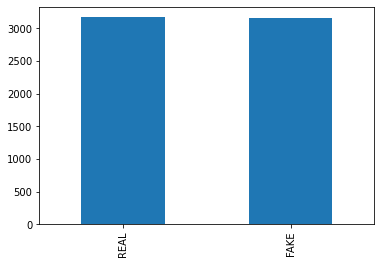

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(4751,)

In [ ]:
x_test.shape

(1584,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
#METHOD 1
from sklearn.svm import SVC 
model1 = SVC()

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8642676767676768

In [ ]:
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)
y_pred2

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.8383838383838383

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [ ]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.8819444444444444

In [ ]:
from sklearn.pipeline import make_pipeline  
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [ ]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.8781565656565656

In [ ]:
import joblib 
joblib.dump(model4,'REAL-FAKE')

['REAL-FAKE']

In [ ]:
import joblib 
text_model = joblib.load('REAL-FAKE')

In [ ]:
text_model.predict(["real"]) 

array(['FAKE'], dtype='<U4')

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py 
import streamlit as st 
import joblib 

st.title("FAKE NEWS DETECTOR:")   
text_model = joblib.load('/content/REAL-FAKE') 
ip = st.text_input("Enter the message :")      
op = text_model.predict([ip])                 
if st.button('PREDICT'):                       
  st.title(op[0]) 

Overwriting app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501

2022-06-09 13:00:42.143 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.73.149.89:8501

npx: installed 22 in 2.897s
your url is: https://swift-eagles-post-34-73-149-89.loca.lt
  Stopping...
^C


**What Is Sentiment Analysis?**

Sentiment analysis is the automated process of identifying and classifying subjective information in text data. This might be an opinion, a judgment, or a feeling about a particular topic or product feature.

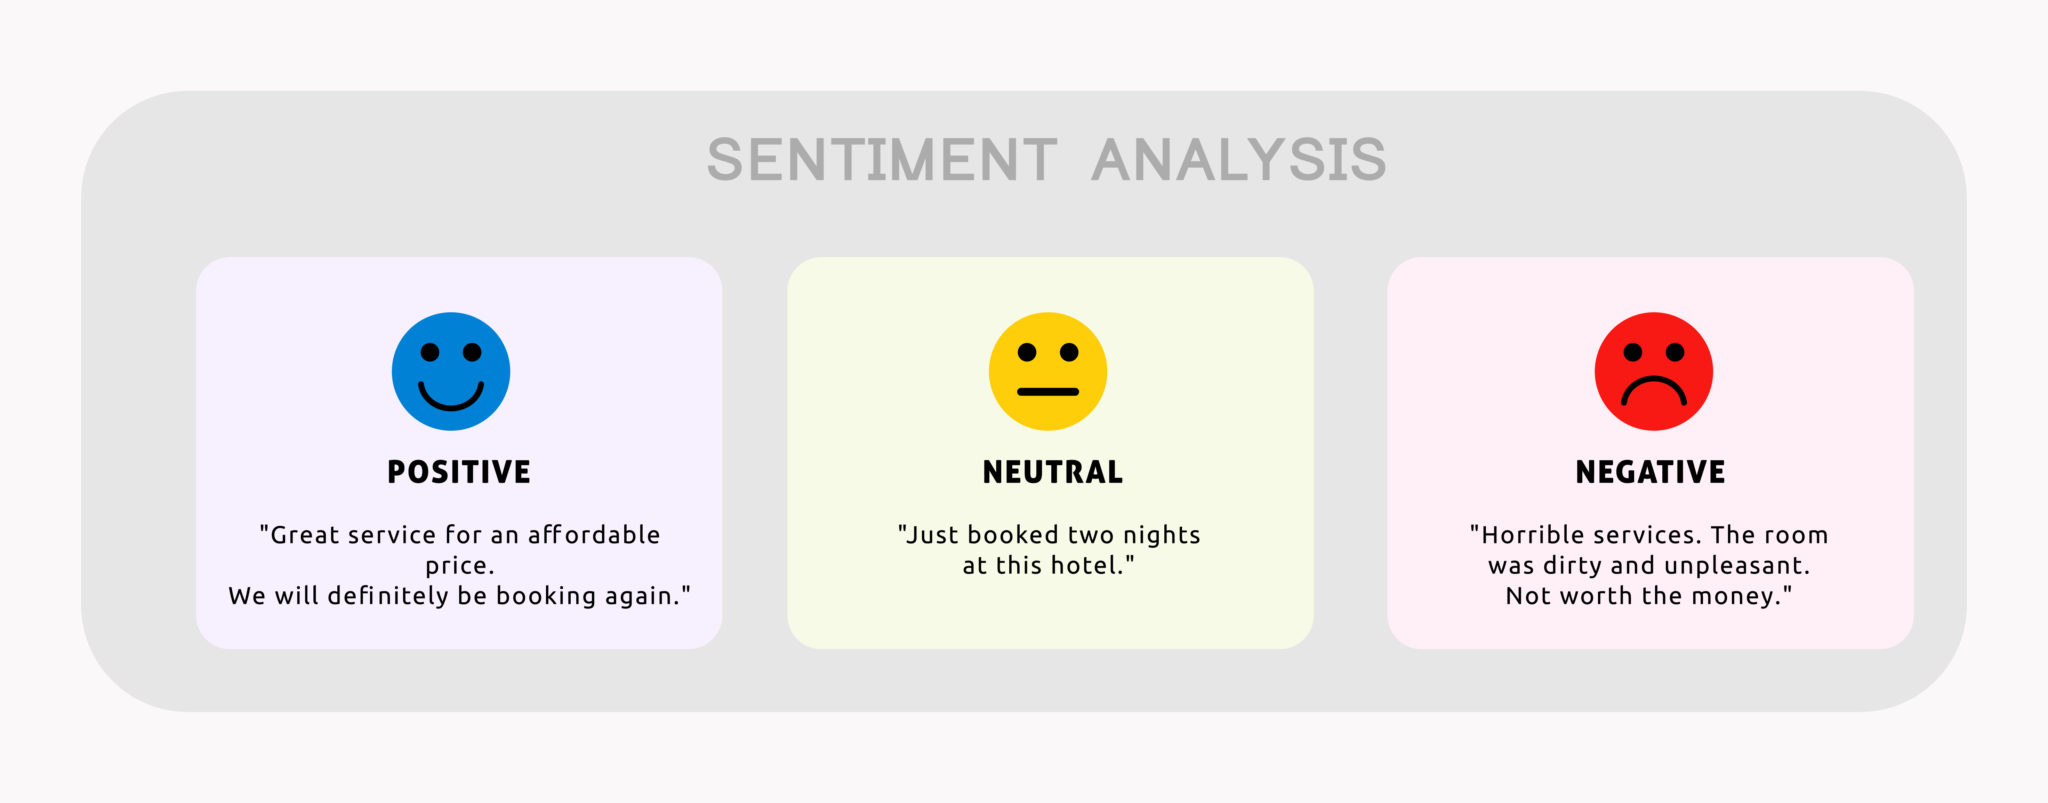


**What is the Twitter Sentiment Analysis?**

Sentiment Analysis is a technique used in text mining. It may, therefore, be described as a text mining technique for analyzing the underlying sentiment of a text message, i.e., a tweet. Twitter sentiment or opinion expressed through it may be positive, negative or neutral. However, no algorithm can give you 100% accuracy or prediction on sentiment analysis.

As a part of Natural Language Processing, algorithms like SVM, Naive Bayes is used in predicting the polarity of the sentence. sentiment analysis of Twitter data may also depend upon sentence level and document level.

Methods like, positive and negative words to find on the sentence is however inappropriate, because the flavor of the text block depends a lot on the context. This may be done by looking at the POS (Part of Speech) Tagging

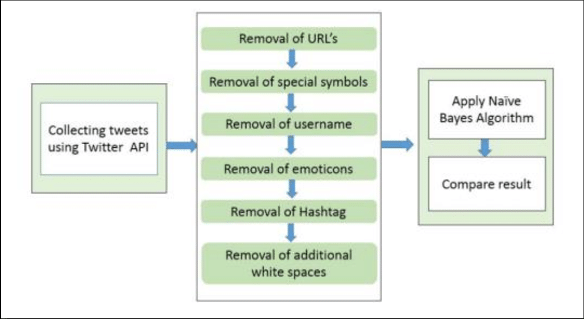
        
        
        
**Sentiment analysis of Twitter Data-set using Naïve Bayes**